### Molecular similarity

In this exercise, you will learn how to use the python library RDkit to read SMILES strings, draw molecules and compute molecular similarity. 

The SMILES strings provided in list.txt represent inhibitors of the protein p38 MAP kinase (for more information, see: https://doi.org/10.1021/acs.jcim.1c00639). The SMILES strings provided in list2.txt represent inhibitors of the protein HSP90. 

RDkit is a python library for chemoinformatics, and it can be used to manipulate small molecules and retrieve their chemical properties. For more information, see:
https://www.rdkit.org/docs/GettingStartedInPython.html

Import the necessary Python libraries.

In [44]:
from rdkit import Chem,DataStructs
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframegrid
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid
from rdkit.Chem import rdMolDescriptors
import numpy as np
import seaborn as sns
import pylab as plt

You can draw a molecule (benzene) from a SMILES string.

In [12]:
mol = Chem.MolFromSmiles("c1ccccc1")

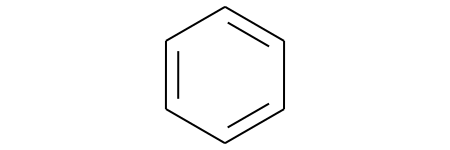

In [4]:
mol

You can read the SMILES strings from a file, and draw these molecules.

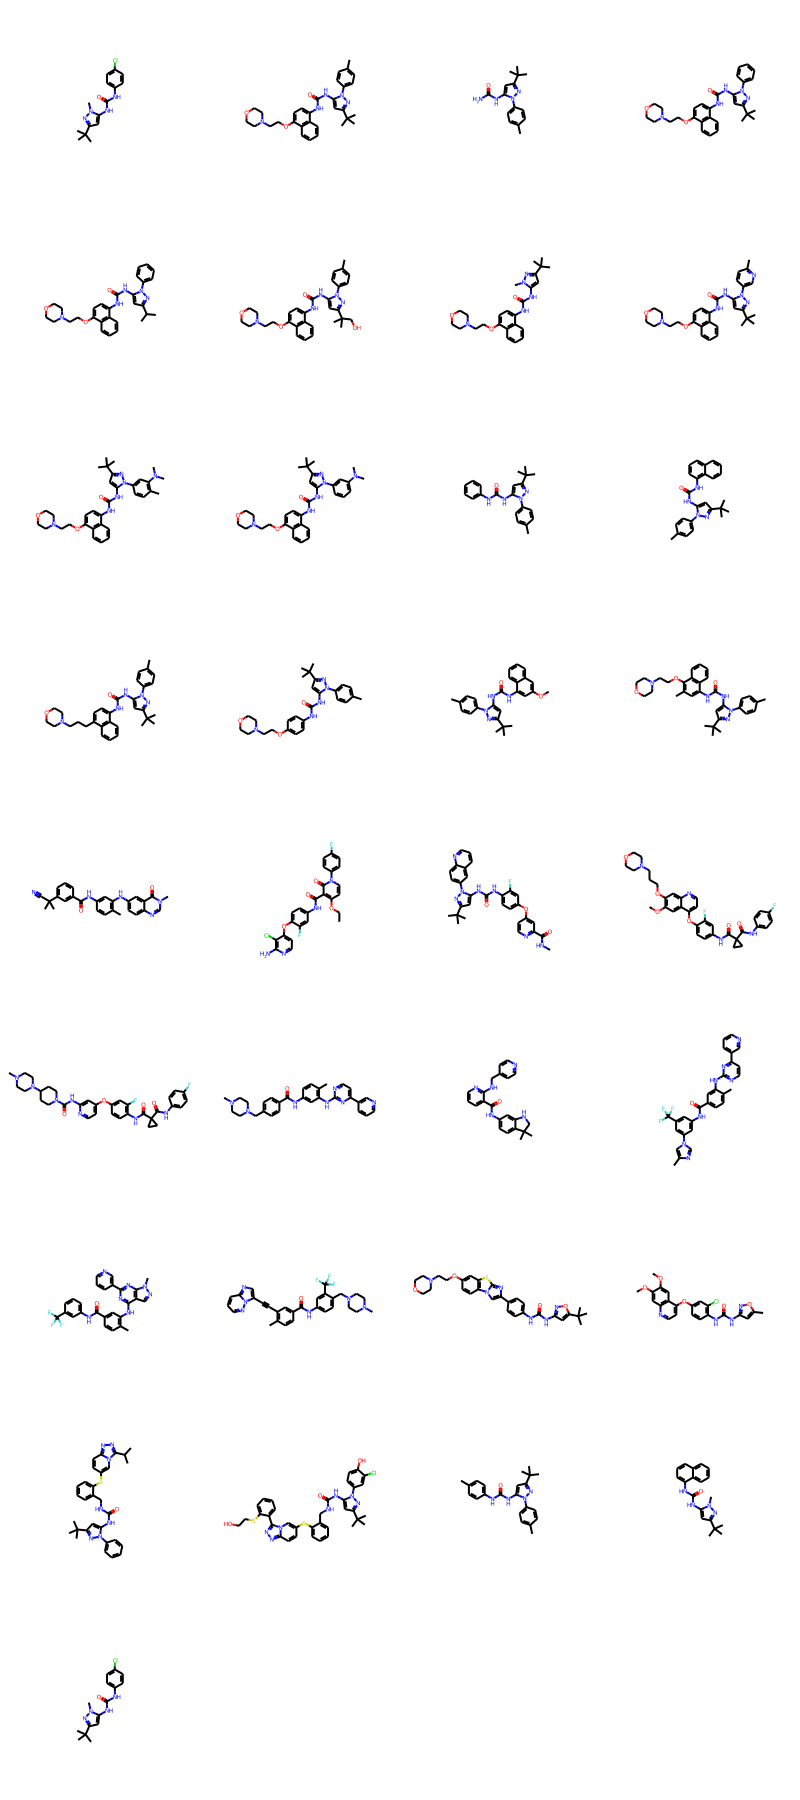

In [16]:
file_mol = open("list.txt", "r")
smiles = []
mols = []
for x in file_mol:
   smiles.append(x)
   mols.append(Chem.MolFromSmiles(x))
file_mol.close()
smiles = np.array(smiles)
mols = np.array(mols)
Draw.MolsToGridImage(mols,molsPerRow=4,useSVG=True)

In the step below, Morgan fingerprints are calculated for the list of molecules.

Other molecular fingerprints are available in RDkit, like the MACCS fingerprints.


In [29]:
# generate fingerprints: Morgan fingerprints, radius of 2 (standard is 2 or 3)
fp=[]
for x in mols:
   fp.append(rdMolDescriptors.GetMorganFingerprint(x,2))


In the step below, the Tanimoto similarity is computed for all pairs of molecules.
You will see a list with the index of the two molecules compared, and the value of the Tanimoto similarity.

Other coefficients are available to compute similarity in RDkit: Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey, and Tversky.

In [41]:
# compare molecules
datax=[]
datay=[]
dataz=[]
for y in fp:
   for x in fp:
      datax.append(fp.index(y))
      datay.append(fp.index(x))
      dataz.append(DataStructs.TanimotoSimilarity(y,x))
      print(fp.index(y),fp.index(x),DataStructs.TanimotoSimilarity(y,x))

0 0 1.0
0 1 0.3203125
0 2 0.48
0 3 0.31496062992125984
0 4 0.2222222222222222
0 5 0.2647058823529412
0 6 0.4380952380952381
0 7 0.3203125
0 8 0.3037037037037037
0 9 0.3082706766917293
0 10 0.5116279069767442
0 11 0.40594059405940597
0 12 0.3203125
0 13 0.4144144144144144
0 14 0.3867924528301887
0 15 0.3153846153846154
0 16 0.2773109243697479
0 17 0.19696969696969696
0 18 0.3106060606060606
0 19 0.17391304347826086
0 20 0.18238993710691823
0 21 0.1956521739130435
0 22 0.22123893805309736
0 23 0.18309859154929578
0 24 0.208955223880597
0 25 0.19148936170212766
0 26 0.2814814814814815
0 27 0.23333333333333334
0 28 0.3023255813953488
0 29 0.2597402597402597
0 30 0.5348837209302325
0 31 0.5897435897435898
0 0 1.0
1 0 0.3203125
1 1 1.0
1 2 0.4188034188034188
1 3 0.8347107438016529
1 4 0.6923076923076923
1 5 0.8916666666666667
1 6 0.7606837606837606
1 7 0.8512396694214877
1 8 0.8046875
1 9 0.8031496062992126
1 10 0.5546218487394958
1 11 0.628099173553719
1 12 0.8360655737704918
1 13 0.7377049

You can generate a heatmap to better visualize the similarity between the molecules.

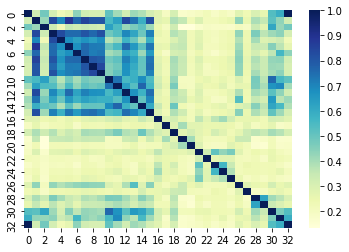

In [43]:
data1 = np.array((dataz))
data = data1.reshape(len(fp),len(fp))
ax = sns.heatmap(data,cmap="YlGnBu")
plt.show()

### Exercise
1- Draw the drug Gleevec using its SMILES string. You can obtain the SMILES string from PubChem, or other databases.

2- Draw the molecules encoded as SMILES strings in the file list2.txt.

3- Compute the similarity among the molecules in the file list2.txt using the fingerprints and similarity score of your choice.